In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from wordcloud import WordCloud
from collections import Counter
import json
import os


# Implicit FLARE Data Analysis

In [12]:
cur_path = os.path.abspath(os.curdir)

with open("../outputs/flare-implicit-mini-analytics.json", 'r') as f:
    data = json.load(f)

In [85]:
datasets = ["flare-implicit-mini", "flare-explicit-mini", "flare-explicit2-mini"]

for dataset in datasets:

    with open(f"../outputs/{dataset}-analytics.json", 'r') as f:
        data = json.load(f)

    api_calls = data['api_calls']
    retrieval_calls = data['retrieval_calls']
    low_prob_toks = Counter(data['low_prob_toks'])
    low_masked_toks = Counter(data['low_masked_toks'])

    # Retrieval probabilities
    print(dataset, retrieval_calls/api_calls)

flare-implicit-mini 0.6166666666666667
flare-explicit-mini 0.6455026455026455
flare-explicit2-mini 0.6693333333333333


In [17]:
api_calls = data['api_calls']
retrieval_calls = data['retrieval_calls']
low_prob_toks = Counter(data['low_prob_toks'])
low_masked_toks = Counter(data['low_masked_toks'])

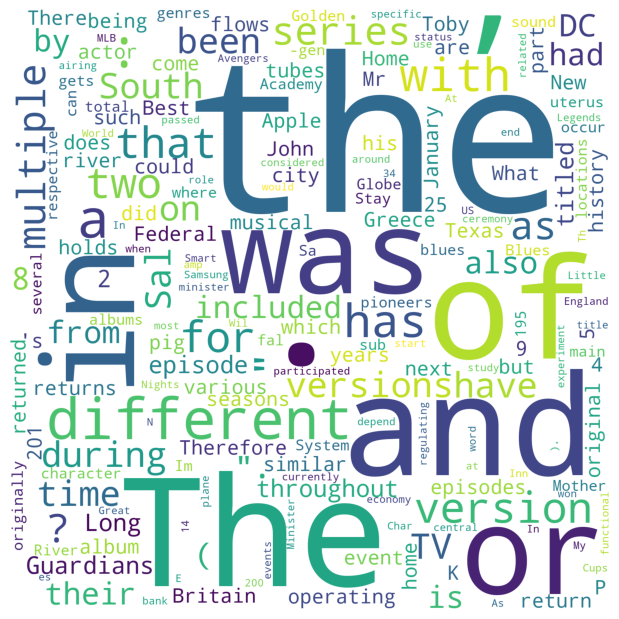

In [25]:
# Generate the word cloud
wordcloud = WordCloud(width = 1600, height = 1600, 
                      background_color ='white', 
                      min_font_size = 10).generate_from_frequencies(low_prob_toks)

# Display the generated Word Cloud
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
# plt.gcf().set_dpi(300)

# If you want to save the word cloud as an image file:
# wordcloud.to_file('wordcloud.png')

plt.show()

In [66]:
low_prob_toks.most_common(10)

[(' the', 45),
 ('.', 23),
 (' The', 20),
 (',', 18),
 (' of', 17),
 (' and', 17),
 (' ', 16),
 (' in', 14),
 (' or', 13),
 (' was', 12)]

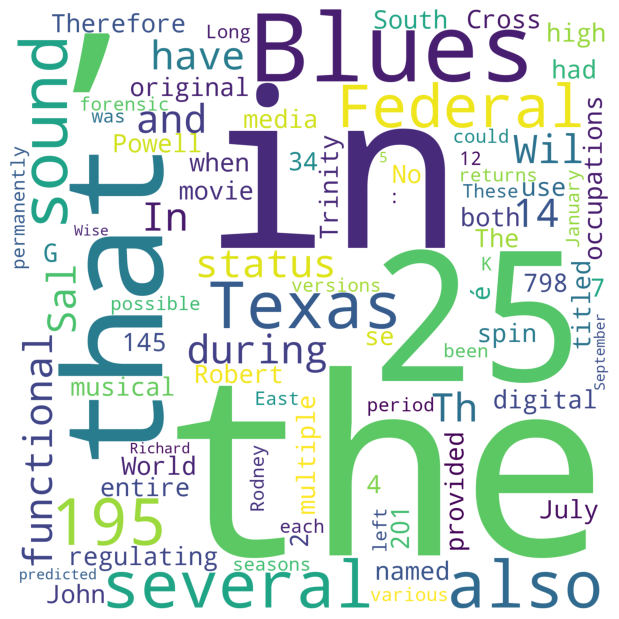

In [26]:
# Generate the word cloud
wordcloud = WordCloud(width = 1600, height = 1600, 
                      background_color ='white', 
                      min_font_size = 10).generate_from_frequencies(low_masked_toks)

# Display the generated Word Cloud
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
# plt.gcf().set_dpi(300)

# If you want to save the word cloud as an image file:
# wordcloud.to_file('wordcloud.png')

plt.show()

In [67]:
low_masked_toks.most_common(10)

[(' ', 5),
 (' the', 4),
 (' in', 3),
 (',', 3),
 ('25', 2),
 (' that', 1),
 (' Blues', 1),
 (' several', 1),
 (' Texas', 1),
 ('195', 1)]

# Graphing Results Comparisons

In [42]:
em_scores = [33.8, 40.0, 39.9, 41.3, 42.3, 37.3, 40.8]
df = pd.DataFrame(em_scores)
df = df.rename(columns={0: 'Exact Match (EM) Score'})
df['dataset'] = 'ASQA'
df['model'] = ['No ret.', 'Single-time ret.', 'Previous-window ret.', 'FLARE orig.', 'FLARE-implicit (ours)', 'FLARE-explicit (ours)', 'FLARE-explicit prompt 2 (ours)']
df

,Exact Match (EM) Score,dataset,model
0,33.8,ASQA,No ret.
1,40.0,ASQA,Single-time ret.
2,39.9,ASQA,Previous-window ret.
3,41.3,ASQA,FLARE orig.
4,42.3,ASQA,FLARE-implicit (ours)
5,37.3,ASQA,FLARE-explicit (ours)
6,40.8,ASQA,FLARE-explicit prompt 2 (ours)


/tmp/ipykernel_104953/3340558249.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="model", y="Exact Match (EM) Score", data=df, palette='dark')


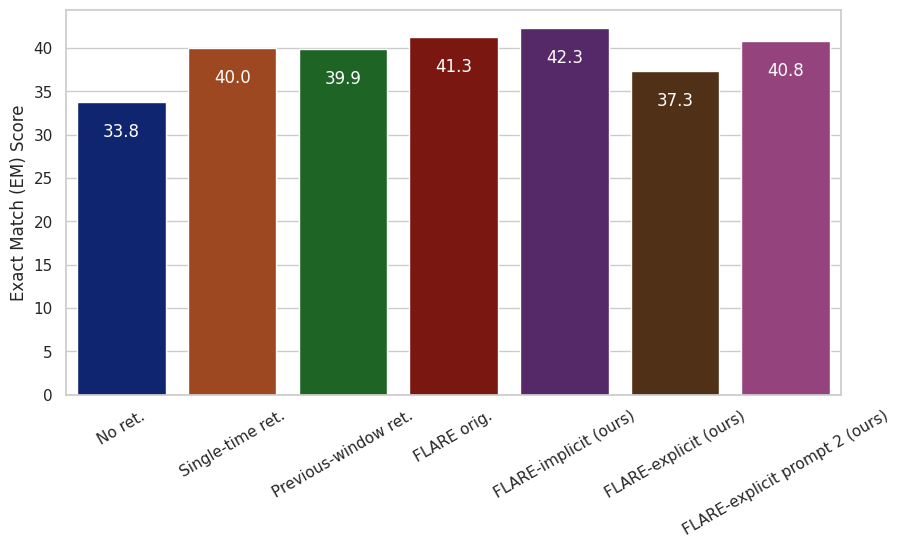

<Figure size 600x800 with 0 Axes>

In [65]:
# Set the theme
sns.set_theme(style="whitegrid")

# Create the barplot
# colors = ['blue', 'red', 'yellow', 'green', 'purple', 'brown', 'orange']
ax = sns.barplot(x="model", y="Exact Match (EM) Score", data=df, palette='dark')

for i, v in enumerate(df.iloc[:, 0]):
   ax.text(i, v-4, str(v), ha='center', color='white')

# ax = sns.barplot(x="Category", y="Values", data=data, palette="viridis")
plt.xlabel("")
plt.xticks(rotation=30)
plt.figure(figsize=(6,8))


# Show the plot
plt.show()

In [80]:
df2 = pd.DataFrame([[41.3, 28.2, 34.3, 31.1, 'FLARE orig.'], [42.3, 24.0, 28.0, 26.0, 'FLARE-implicit'], [37.3, 21.3, 27.6, 24.2, "FLARE-explicit"], [40.8, 21.8, 27.3, 24.4, "FLARE-explicit 2"]])
df2 = df2.rename(columns={0: "EM", 1: "D-F1", 2: "R-L", 3: "DR"})
df2 = df2.set_index(4)
df2.index.name = None
df2

,EM,D-F1,R-L,DR
FLARE orig.,41.3,28.2,34.3,31.1
FLARE-implicit,42.3,24.0,28.0,26.0
FLARE-explicit,37.3,21.3,27.6,24.2
FLARE-explicit 2,40.8,21.8,27.3,24.4


In [83]:
print(df2.to_latex())

\begin{tabular}{lrrrr}
\toprule
 & EM & D-F1 & R-L & DR \\
\midrule
FLARE orig. & 41.300000 & 28.200000 & 34.300000 & 31.100000 \\
FLARE-implicit & 42.300000 & 24.000000 & 28.000000 & 26.000000 \\
FLARE-explicit & 37.300000 & 21.300000 & 27.600000 & 24.200000 \\
FLARE-explicit 2 & 40.800000 & 21.800000 & 27.300000 & 24.400000 \\
\bottomrule
\end{tabular}

